In [ ]:
#importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import itertools
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading data
df=pd.read_csv("/content/drive/MyDrive/sales_forecating_train.csv",parse_dates=['date'])

In [ ]:
#data_set
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [ ]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [ ]:
#null values
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
#represent month in date field as its first day
df['date'] = df['date'].dt.year.astype('str') + '-' + df['date'].dt.month.astype('str') + '-01'
df['date'] = pd.to_datetime(df['date'])
#groupby date and sum the sales
df = df.groupby('date').sales.sum().reset_index()

In [ ]:
df

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


In [ ]:
df["date"]

0    2013-01-01
1    2013-02-01
2    2013-03-01
3    2013-04-01
4    2013-05-01
5    2013-06-01
6    2013-07-01
7    2013-08-01
8    2013-09-01
9    2013-10-01
10   2013-11-01
11   2013-12-01
12   2014-01-01
13   2014-02-01
14   2014-03-01
15   2014-04-01
16   2014-05-01
17   2014-06-01
18   2014-07-01
19   2014-08-01
20   2014-09-01
21   2014-10-01
22   2014-11-01
23   2014-12-01
24   2015-01-01
25   2015-02-01
26   2015-03-01
27   2015-04-01
28   2015-05-01
29   2015-06-01
30   2015-07-01
31   2015-08-01
32   2015-09-01
33   2015-10-01
34   2015-11-01
35   2015-12-01
36   2016-01-01
37   2016-02-01
38   2016-03-01
39   2016-04-01
40   2016-05-01
41   2016-06-01
42   2016-07-01
43   2016-08-01
44   2016-09-01
45   2016-10-01
46   2016-11-01
47   2016-12-01
48   2017-01-01
49   2017-02-01
50   2017-03-01
51   2017-04-01
52   2017-05-01
53   2017-06-01
54   2017-07-01
55   2017-08-01
56   2017-09-01
57   2017-10-01
58   2017-11-01
59   2017-12-01
Name: date, dtype: datetime64[ns]

In [ ]:
#Know the earliest date recorded
df['date'].min()

Timestamp('2013-01-01 00:00:00')

In [ ]:
#Know the first date recorded
df['date'].max()

Timestamp('2017-12-01 00:00:00')

In [ ]:
#Now let's sort furniture datframe according to order date
df = df.sort_values('date')
df


,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


In [ ]:
data1=df
data1=data1.set_index(['date'])

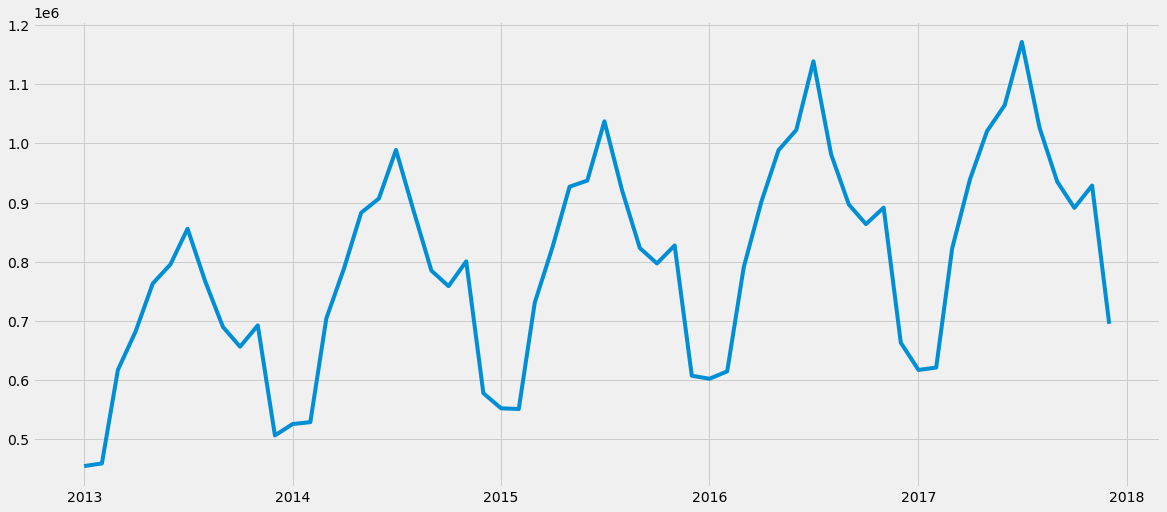

In [ ]:
#plot monthly sales
plt.plot(data1)

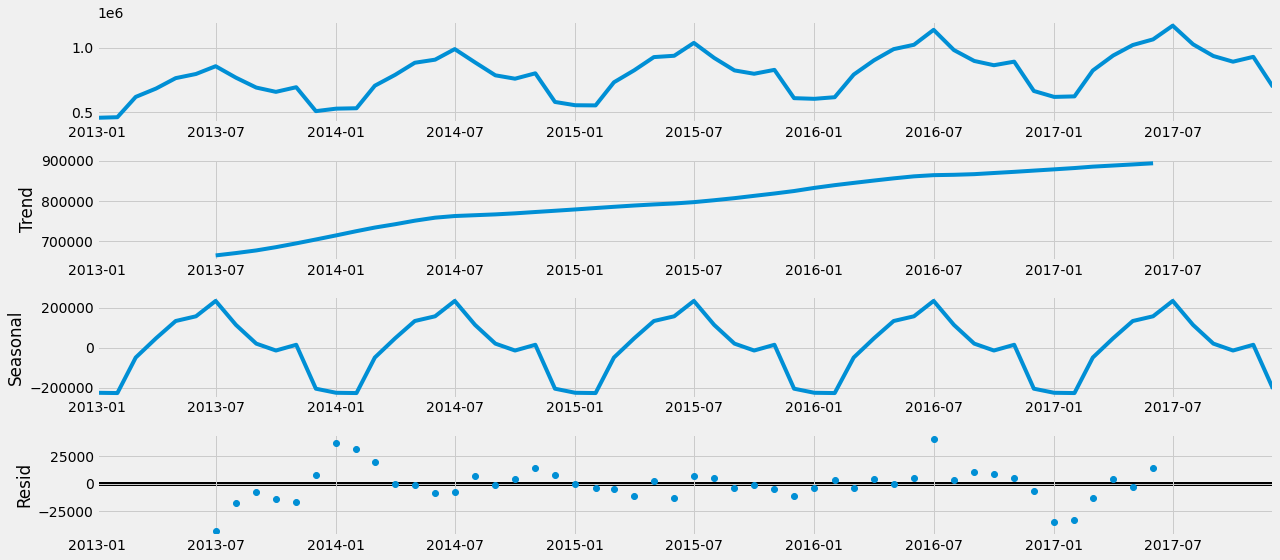

In [ ]:
#analysing trend, seasonality and residuals


from pylab import rcParams

rcParams['figure.figsize']=18,8
decompo_df = sm.tsa.seasonal_decompose(data1,model='additive')
fig = decompo_df.plot()
plt.show()

#ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
#applying adf_test to data

adf_test(data1)

Augmented Dickey-Fuller Test: 
ADF test statistic      -5.247519
p-value                  0.000007
# lags used             11.000000
# observations          48.000000
critical value (1%)     -3.574589
critical value (5%)     -2.923954
critical value (10%)    -2.600039
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


p value is less than .5 hence null hypo is rejected ... data is stationary

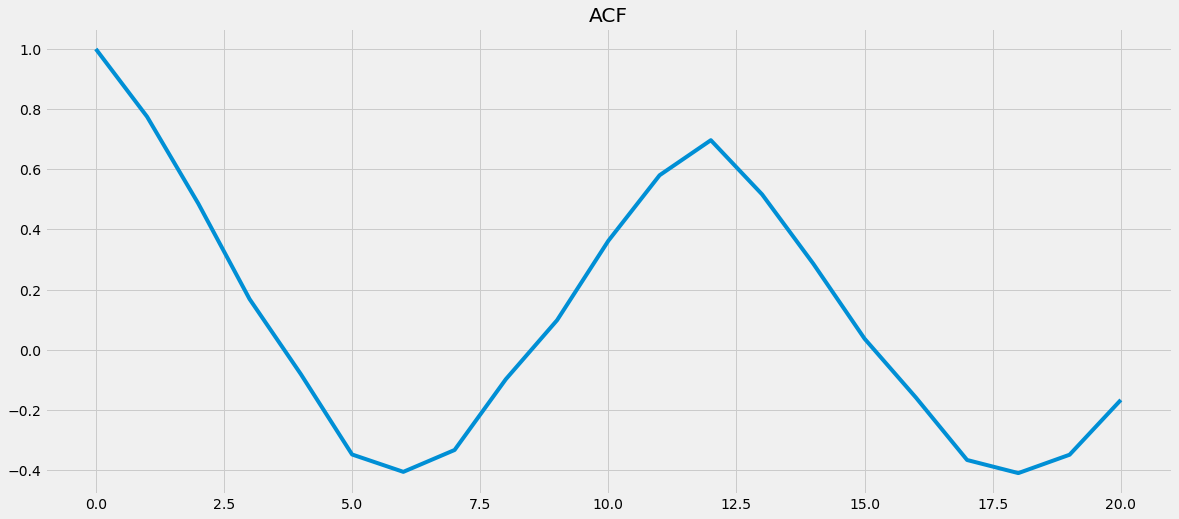

In [ ]:
#plotting acf and pcf
from statsmodels.tsa.stattools import acf,pacf
p_acf=acf(data1,nlags=20)
plt.title("ACF")
plt.plot(p_acf)

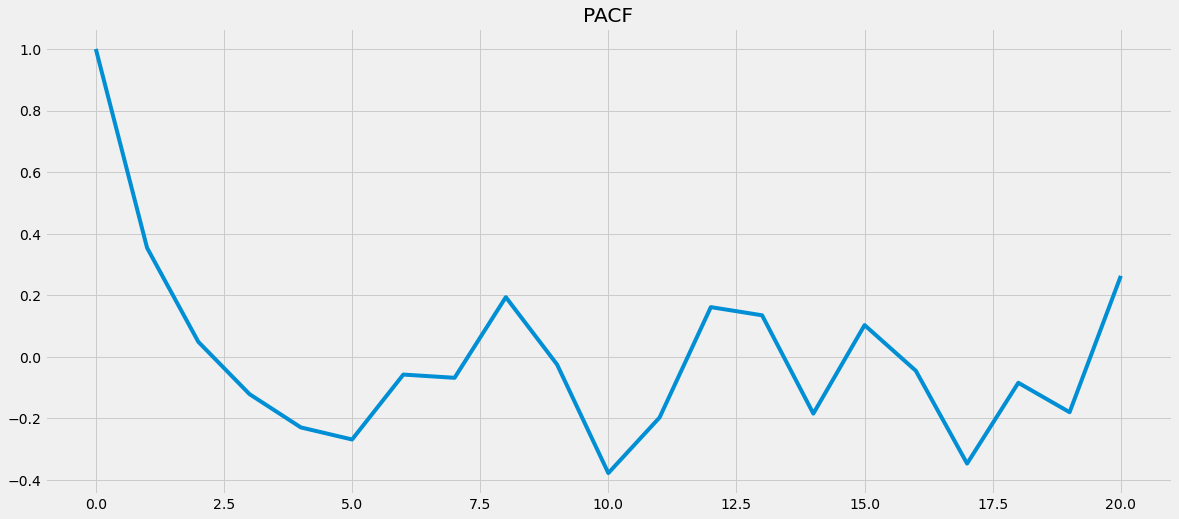

In [ ]:
#PACF
p_acf=pacf(y_furniture,nlags=20)
plt.title("PACF")
plt.plot(p_acf)

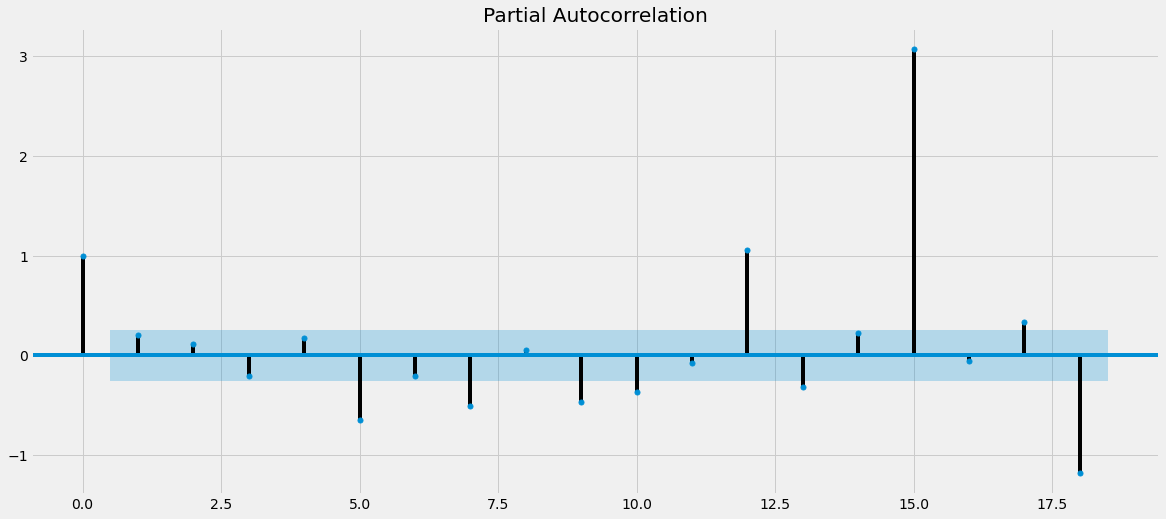

In [ ]:
#PARTIAL AUTO CORRELATION / DIFFRENT VIEW
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
picpacf=plot_pacf(data1.diff().dropna())

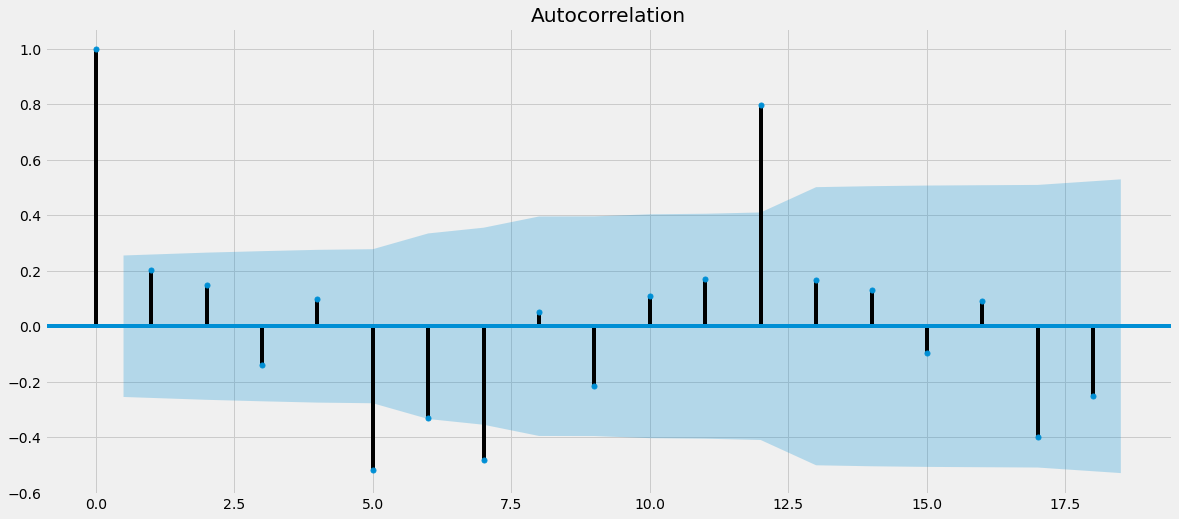

In [ ]:
picpacf=plot_acf(data1.diff().dropna())

In [ ]:
#LENGTH OF DATA
len(data1)

60

In [ ]:
#SPLITTING INTO TRAIN AND TEST
train = data1.iloc[:50]
test = data1.iloc[10:]

# **LSTM**

In [ ]:
#importing librarires
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# **Data Preprocessing**

In [ ]:
#applying min max scalar
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train.values.reshape(-1,1))

prediction_days = 10

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])


x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# #**LSTM model**

In [ ]:

model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next value

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train, y_train, epochs = 100, batch_size=1, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 128)           66560     
                                                                 
 dropout_3 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 10, 128)           131584    
                                                                 
 dropout_4 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

#**Pediction**

In [ ]:
actual_temp = test.values
total_temp = pd.concat((pd.DataFrame(train),pd.DataFrame(test)))

model_inputs = total_temp[len(total_temp)-len(test)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


# Make Predictions on Test Data
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)
pred

2/2 [==============================] - 0s 15ms/step


array([[ 726660.  ],
       [ 839948.9 ],
       [ 933293.94],
       [ 891928.75],
       [ 846029.3 ],
       [ 849736.75],
       [ 826904.56],
       [ 863459.9 ],
       [ 883412.8 ],
       [ 880276.5 ],
       [ 800137.2 ],
       [ 738715.4 ],
       [ 742176.44],
       [ 560584.  ],
       [ 543390.8 ],
       [ 552739.3 ],
       [ 657504.6 ],
       [ 801668.  ],
       [ 934740.56],
       [1007246.06],
       [1023418.9 ],
       [ 950261.8 ],
       [ 811725.6 ],
       [ 804597.56],
       [ 784563.44],
       [ 570085.56],
       [ 550993.94],
       [ 569947.06],
       [ 693899.1 ],
       [ 829886.3 ],
       [ 989929.2 ],
       [1059802.9 ],
       [1043326.9 ],
       [ 993487.8 ],
       [ 844616.44],
       [ 865118.7 ],
       [ 700279.06],
       [ 575080.8 ],
       [ 585200.44],
       [ 626089.7 ],
       [ 726660.  ],
       [ 854931.7 ],
       [1009386.1 ],
       [1075291.8 ],
       [1070870.8 ],
       [1011767.25],
       [ 850361.5 ],
       [ 8746

#**Graph Of Predicted v/s Actual**

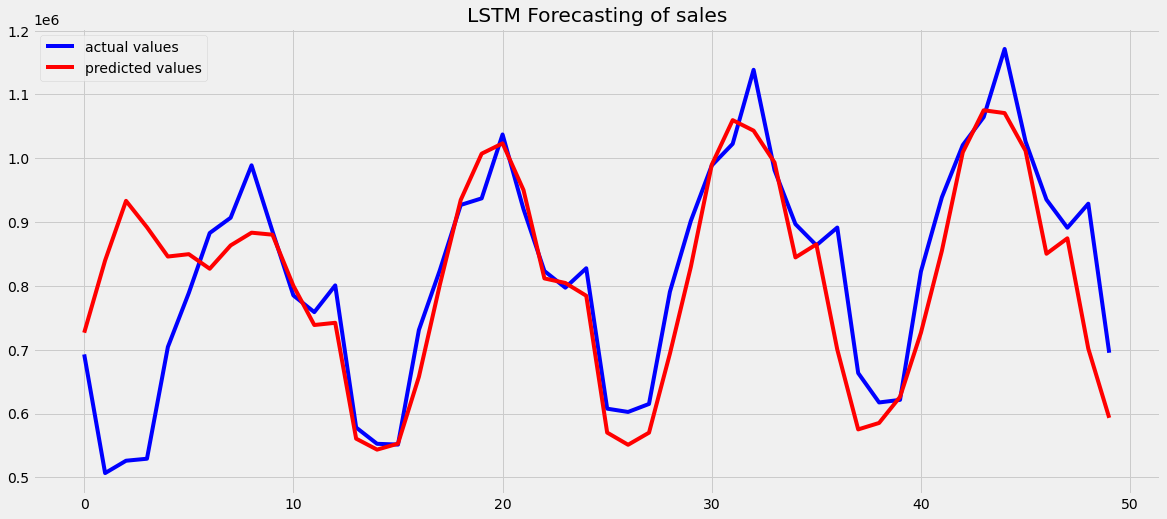

In [ ]:
#predicted v/s actual

plt.plot(test.values,label="actual values",color="blue")
plt.plot(pred,label="predicted values",color="red")
plt.title("LSTM Forecasting of sales")
plt.legend()